In [7]:
import pandas as pd

# Cargar los datos
data = pd.read_csv("recursos_humanos.csv")

# Mostrar las primeras filas para entender la estructura del dataframe
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


(   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
 0                0.38             0.53               2                   157   
 1                0.80             0.86               5                   262   
 2                0.11             0.88               7                   272   
 3                0.72             0.87               5                   223   
 4                0.37             0.52               2                   159   
 
    time_spend_company  Work_accident  left  promotion_last_5years  sales  \
 0                   3              0     1                      0  sales   
 1                   6              0     1                      0  sales   
 2                   4              0     1                      0  sales   
 3                   5              0     1                      0  sales   
 4                   3              0     1                      0  sales   
 
    salary  
 0     low  
 1  medium  
 2  mediu

In [8]:
# Recodificación de variables categóricas
data_encoded = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)

# Análisis exploratorio: Verificar el balance de la variable objetivo 'left'
balance = data['left'].value_counts(normalize=True)

# Mostrar la distribución de la variable 'left'
balance


left
0    0.761917
1    0.238083
Name: proportion, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Separar las características y la variable objetivo
X = data_encoded.drop('left', axis=1)
y = data_encoded['left']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Estandarizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluar diferentes valores de k
k_values = range(1, 21)
cv_scores = []

# Cross-validation para cada valor de k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Determinar el valor óptimo de k
optimal_k = k_values[np.argmax(cv_scores)]
optimal_k, max(cv_scores)


(1, 0.9627589995006582)

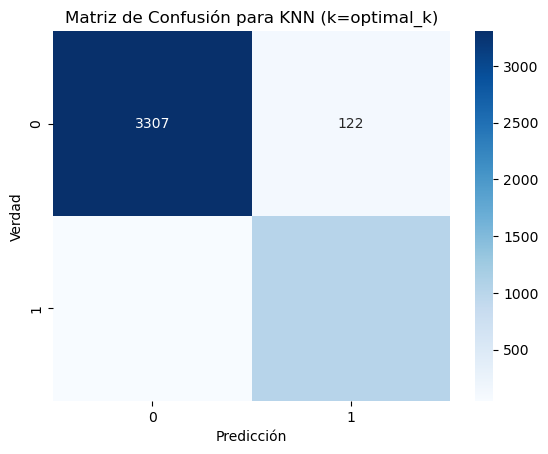

In [11]:
# Entrenar el modelo con el k óptimo
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para KNN (k=optimal_k)')
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

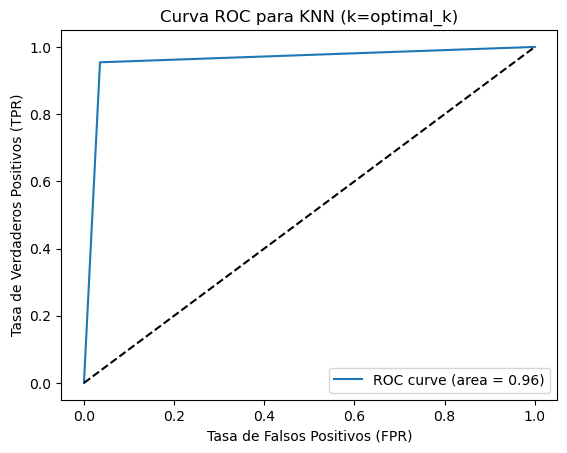

In [12]:

from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades predichas
y_prob = knn.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para KNN (k=optimal_k)')
plt.legend(loc='best')
plt.show()
